In [1]:
import matplotlib.pyplot as plt


In [6]:
image_path = r"C:\Users\Acer Nitro 5\Downloads\Lenna_(test_image).png"


In [10]:
image = plt.imread(image_path)

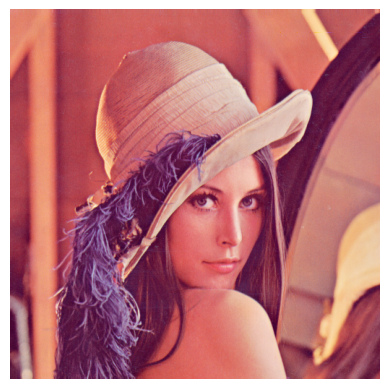

In [11]:
plt.imshow(Lenna)
plt.axis('off')  # Hide axes for better visualization
plt.show()

(-0.5, 99.5, 99.5, -0.5)

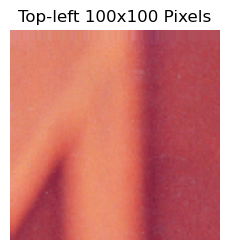

In [12]:
# 1. Display the top-left 100x100 pixels
top_left_100x100 = image[:100, :100, :]  # Extracting the region

plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(top_left_100x100)
plt.title("Top-left 100x100 Pixels")
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

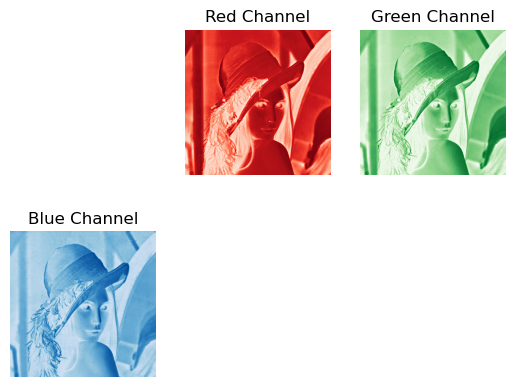

In [13]:
# 2. Separate and display the R, G, and B channels
R_channel = image[:, :, 0]  # Red channel
G_channel = image[:, :, 1]  # Green channel
B_channel = image[:, :, 2]  # Blue channel

plt.subplot(2, 3, 2)
plt.imshow(R_channel, cmap="Reds")  # Display red channel
plt.title("Red Channel")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(G_channel, cmap="Greens")  # Display green channel
plt.title("Green Channel")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(B_channel, cmap="Blues")  # Display blue channel
plt.title("Blue Channel")
plt.axis("off")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


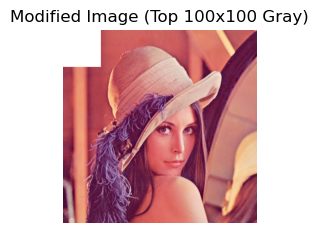

In [14]:
# 3. Modify the top-left 100x100 pixels to 210 (light gray)
modified_image = image.copy()  # Make a copy to avoid modifying original
modified_image[:100, :100] = 210  # Assigning 210 to the first 100x100 pixels

plt.subplot(2, 3, 5)
plt.imshow(modified_image)
plt.title("Modified Image (Top 100x100 Gray)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Ex 2


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
# Load the grayscale image using Pillow
image_path = r"C:\Users\Acer Nitro 5\Downloads\cameraman.png"
gray_image = Image.open(image_path).convert("L")  # Convert to grayscale

In [17]:
# Convert grayscale image to NumPy array
gray_array = np.array(gray_image)

(-0.5, 511.5, 511.5, -0.5)

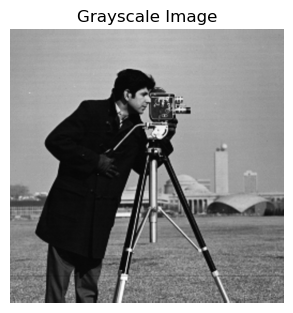

In [19]:

# Display the grayscale image
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(gray_array, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")


(-0.5, 511.5, 149.5, -0.5)

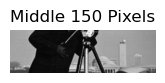

In [22]:
# 2. Extract and display the middle 150-pixel section
height, width = gray_array.shape
start_y = height // 2 - 75  # Middle section start
end_y = start_y + 150  # Middle section end

middle_section = gray_array[start_y:end_y, :]
plt.subplot(2, 3, 2)
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150 Pixels")
plt.axis("off")


(-0.5, 511.5, 511.5, -0.5)

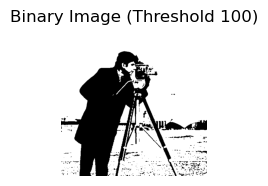

In [23]:
# 3. Apply thresholding (Binary Image)
threshold_value = 100
binary_image = np.where(gray_array < threshold_value, 0, 255).astype(np.uint8)

plt.subplot(2, 3, 3)
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Threshold 100)")
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

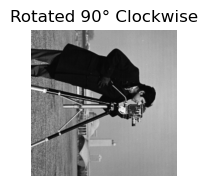

In [24]:
# 4. Rotate the image 90° clockwise
rotated_image = np.rot90(gray_array, k=-1)  # NumPy rotates counterclockwise, k=-1 for clockwise

plt.subplot(2, 3, 4)
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated 90° Clockwise")
plt.axis("off")

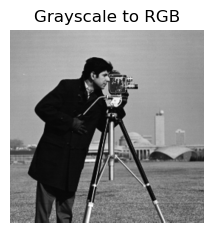

In [25]:
# 5. Convert grayscale image to RGB
rgb_image = np.stack((gray_array,)*3, axis=-1)  # Replicate grayscale into 3 channels

plt.subplot(2, 3, 5)
plt.imshow(rgb_image)
plt.title("Grayscale to RGB")
plt.axis("off")

plt.tight_layout()
plt.show()

# Ex 3

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [27]:
# Load the grayscale image
image_path = r"C:\Users\Acer Nitro 5\Downloads\cameraman.png"
gray_image = Image.open(image_path).convert("L")  # Convert to grayscale
gray_array = np.array(gray_image, dtype=np.float64)  # Convert to NumPy array


In [28]:
# 1. Standardize the data (Centering: Mean = 0)
mean_image = np.mean(gray_array, axis=0)  # Compute mean per column
standardized_image = gray_array - mean_image  # Centering

# Compute covariance matrix
cov_matrix = np.cov(standardized_image, rowvar=False)

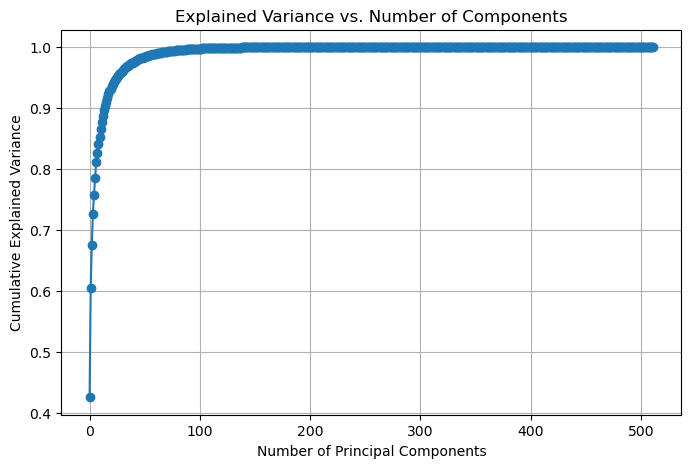

In [29]:
# 2. Compute Eigenvalues & Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Eigen decomposition

# Sort eigenvalues & eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Compute cumulative variance explained
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker="o", linestyle="-")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

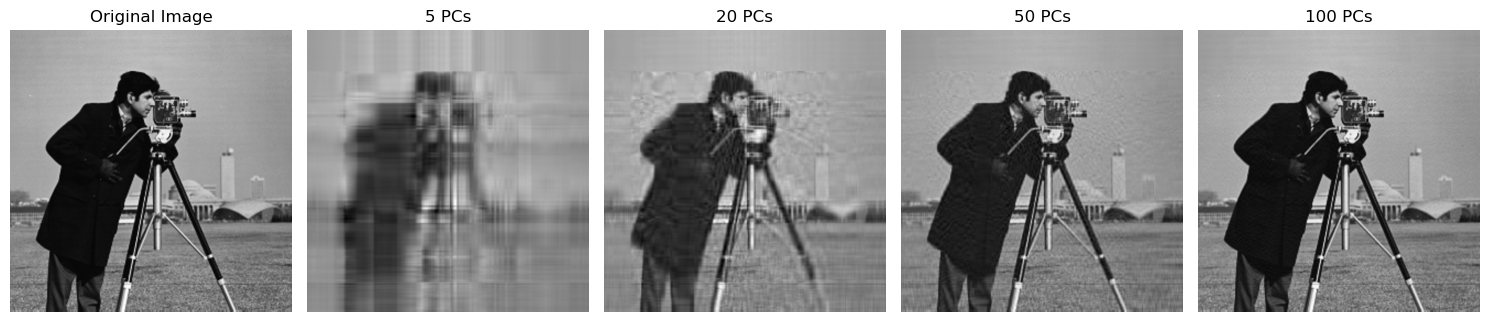

In [31]:
# 3. Reconstruction with different numbers of PCs
components = [5, 20, 50, 100]  # Select different numbers of PCs
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Original Image
axes[0].imshow(gray_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

for i, k in enumerate(components):
    # Select top-k eigenvectors
    top_k_eigenvectors = eigenvectors[:, :k]

    # Project onto k principal components
    reduced_image = np.dot(standardized_image, top_k_eigenvectors)

    # Reconstruct image
    reconstructed_image = np.dot(reduced_image, top_k_eigenvectors.T) + mean_image

    # Display reconstructed image
    axes[i+1].imshow(reconstructed_image, cmap="gray")
    axes[i+1].set_title(f"{k} PCs")
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()